In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly

In [3]:
a=pd.read_csv(r'C:\Users\nagar\Documents\python files\project\Case Study 1 - Retail Case Study\Customer.csv')

s=pd.read_csv(r'C:\Users\nagar\Documents\python files\project\Case Study 1 - Retail Case Study\prod_cat_info.csv')
d=pd.read_csv(r'C:\Users\nagar\Documents\python files\project\Case Study 1 - Retail Case Study\Transactions.csv')

In [5]:
a1=pd.merge(a,d,how='inner',left_on='customer_Id',right_on='cust_id')
customer_final=pd.merge(a1,s,how='left')

customer_final.tran_date=pd.to_datetime(customer_final.tran_date)

-2. Prepare a summary report for the merged data set.

In [6]:
print('the columns and their data type')
print(customer_final.dtypes)
print('The 10 Top  observation')
print(customer_final.head(10))
print('The 10 Bottom  observation')
print(customer_final.tail(10))
print('5 number summary of contenous variable')
print(customer_final.select_dtypes('number').describe())
print('Frequncy table of categorical variable')
print(customer_final.select_dtypes('object').value_counts())

the columns and their data type
customer_Id                   int64
DOB                          object
Gender                       object
city_code                   float64
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object
The 10 Top  observation
   customer_Id         DOB Gender  city_code  transaction_id  cust_id  \
0       268408  02-01-1970      M        4.0     87243835584   268408   
1       268408  02-01-1970      M        4.0     87243835584   268408   
2       268408  02-01-1970      M        4.0     87243835584   268408   
3       268408  02-01-1970

3. Generate histograms for all continuous variables and frequency bars for categorical variables.


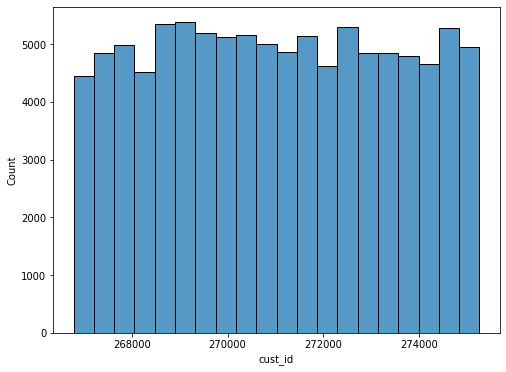

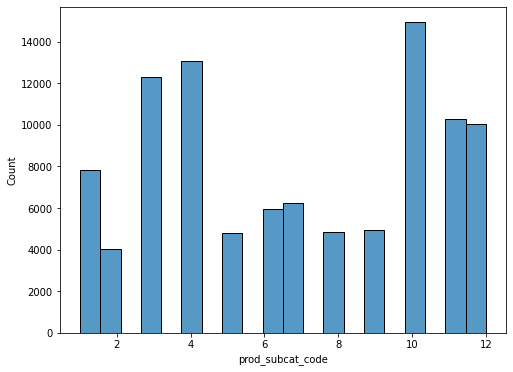

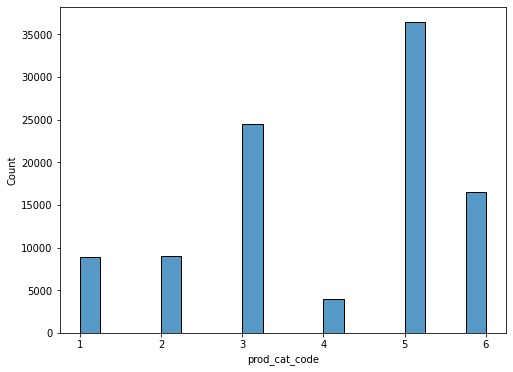

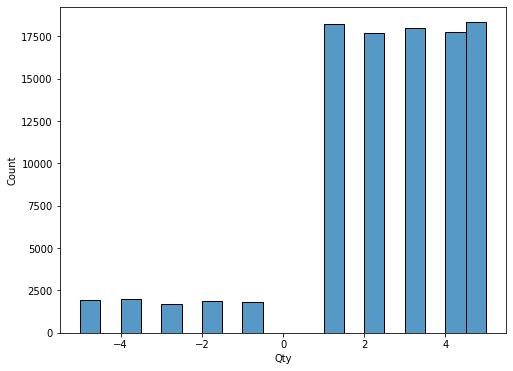

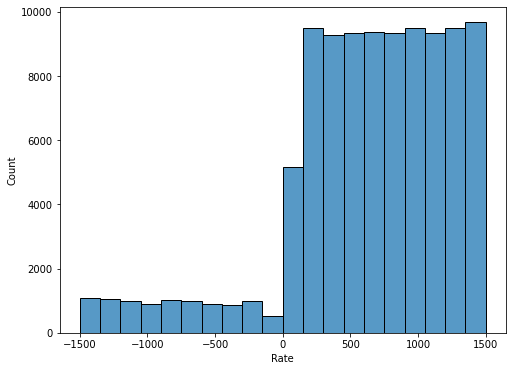

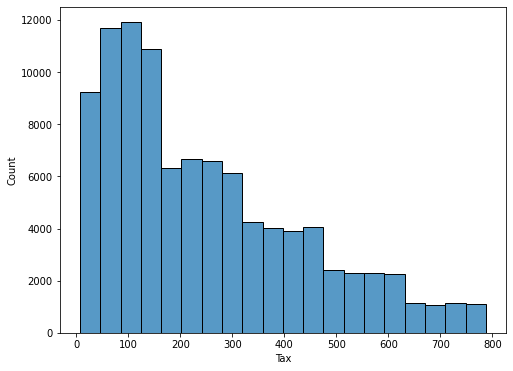

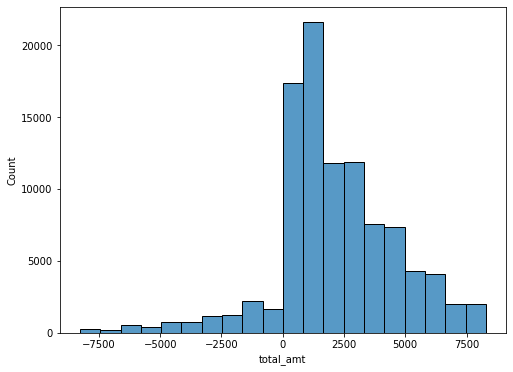

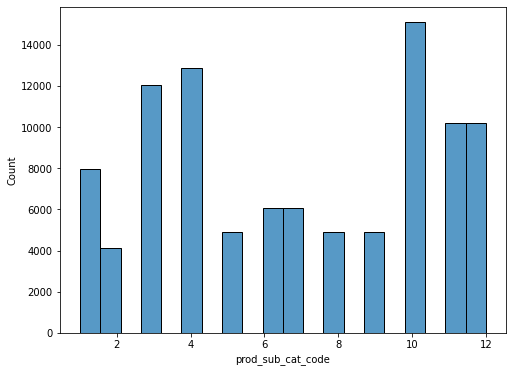

In [7]:
con=customer_final.select_dtypes('number')[['cust_id',
       'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt',
       'prod_sub_cat_code']].columns
for i in con:
    plt.figure(figsize=(8, 6))
    sns.histplot(customer_final[i],bins=20)
    
    


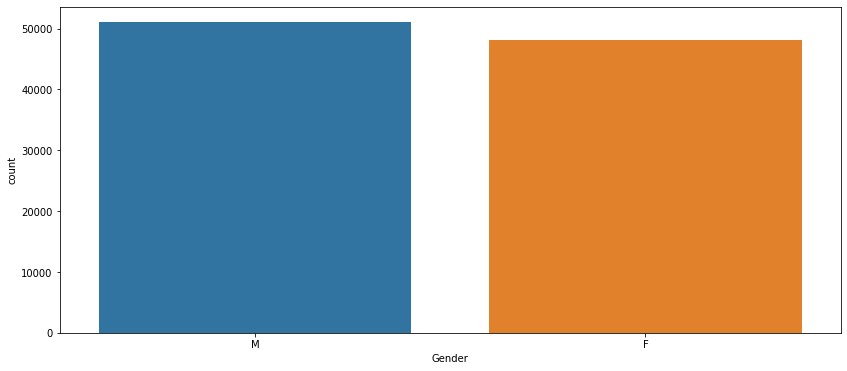

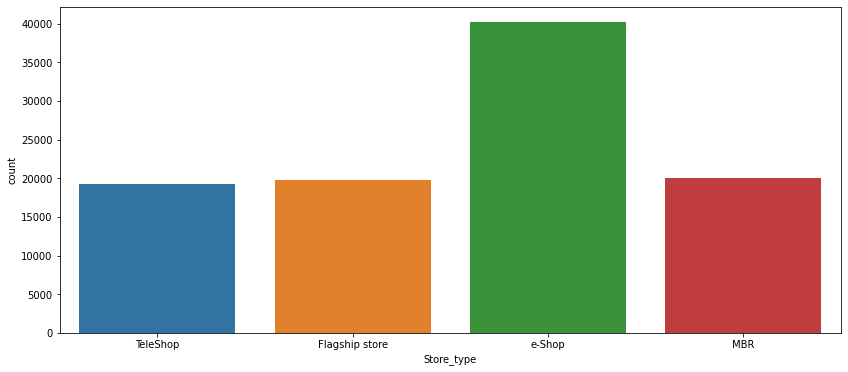

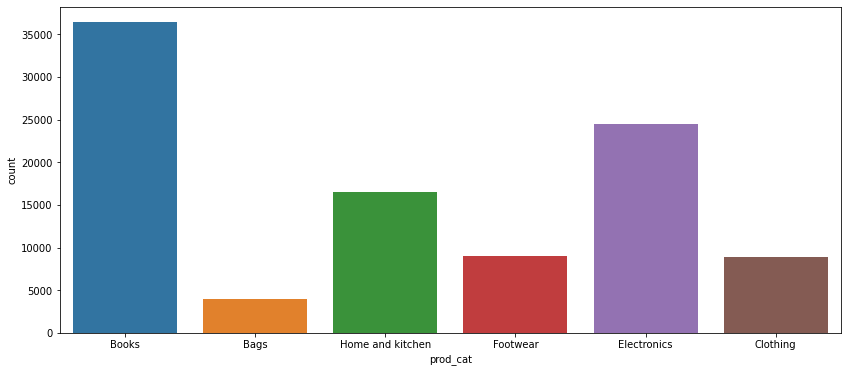

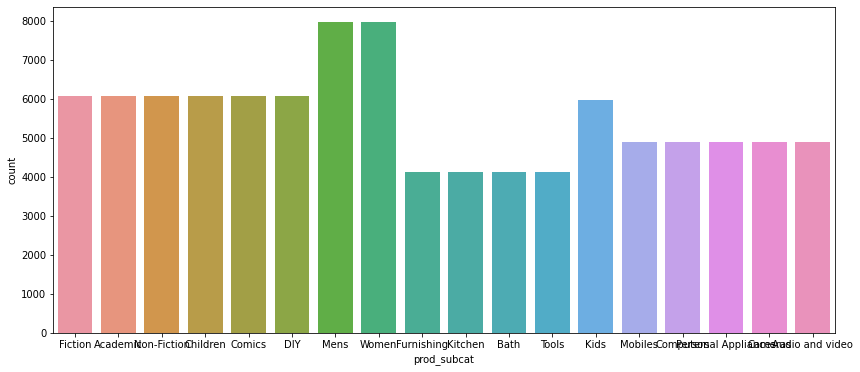

In [8]:
cat=customer_final.select_dtypes('object').drop(columns=['DOB']).columns
for j in cat:
    plt.figure(figsize=(14, 6))
    sns.countplot(x=customer_final[j])

-4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data
 b. Count of transactions where the total amount of transaction was negativ

In [9]:
##a
q=customer_final.loc[0,'tran_date']-customer_final.tran_date.iloc[-1]
q

Timedelta('646 days 00:00:00')

In [10]:
##b
len(customer_final[customer_final.Qty<0])

9294

-5. Analyze which product categories are more popular among females vs male customers.

In [11]:
customer_final.groupby(['Gender','prod_cat'])['Qty'].agg(['sum']).unstack()

sum                                                      
prod_cat  Bags  Books Clothing Electronics Footwear Home and kitchen
Gender                                                              
F         4724  42420    10275       29160    11148            19580
M         4692  45522    11244       32380    10665            20164

-6. Which City code has the maximum customers and what was the percentage of customers from 
that city?



In [12]:
percp=(customer_final.city_code.value_counts().max()/len(customer_final))*100
maxci=customer_final.city_code.value_counts().idxmax()
print(f'City with most customer     {  percp:.2f}')
print(f'Percentage of customer from that city  {  maxci}')

City with most customer     10.65
Percentage of customer from that city  4.0


-7. Which store type sells the maximum products by value and by quantity?

In [13]:
##by quantity
customer_final.groupby('Store_type')['Qty'].sum().head(1)

Store_type
Flagship store    48007
Name: Qty, dtype: int64

In [14]:
##By sales value
customer_final.groupby('Store_type')['total_amt'].sum().head(1)

Store_type
Flagship store    41883973.04
Name: total_amt, dtype: float64

-8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores?

In [15]:
eit=customer_final[customer_final.prod_cat.isin(['Electronics','Clothing'])& (customer_final['Store_type']=='Flagship store')]['Rate'].sum()
print(f'total amount earned from the "Electronics" and "Clothing" categories from  Flagship Stores {eit}')

total amount earned from the "Electronics" and "Clothing" categories from  Flagship Stores 4343614


-9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [16]:
nine=customer_final[(customer_final['Gender']=='M')&(customer_final['prod_cat']=='Electronics')]['Rate'].sum()
print(f'total amount earned from "Male" customers under the "Electronics" category {nine}')


total amount earned from "Male" customers under the "Electronics" category 8459400


-10. How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?


In [71]:
tot=d[d.Qty>0].groupby('cust_id')['transaction_id'].count()
print(f'Total customers with no returns, made more than 10 transaction are {tot[tot>10].count()}')

Total customers with no returns, made more than 10 transaction are 6


-11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?
 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [ ]:
##a
cust_bet_25_35=customer_final[(customer_final.age>=25)&(customer_final.age<=35)]



eb=cust_bet_25_35[cust_bet_25_35['prod_cat'].isin(['Books','Electronics'])]['Rate'].sum()
print(f'Total purchase made by people of age between 25 to 35 in BOOKS and ELECTRONICS is {eb}')

In [183]:
##B there was no entries between 1st Jan, 2014 to 1st Mar, 2014, hence, I will proceed with year 2013, the final transcation year

eleb=final[(final.tran_date>='01-03-2013')&(final.tran_date>='01-01-2013')]['Rate'].sum()
print(f'Total payment mede by these people between 1st Jan, 2013 to 1st Mar, 2013 is  {eleb}')

Total payment mede by these people between 1st Jan, 2013 to 1st Mar, 2013 is  4140686
